In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
from matplotlib.pylab import spy
from matplotlib.pyplot import spy
import scipy.spatial.distance as ssd
from sklearn.metrics import accuracy_score  #计算分类预测的准确率
from sklearn.model_selection import KFold 


import matrices as mat
import graph_fourier_transform as graphFT
import cmath

In [2]:
datafile = 'geneNetwork_rawPCNCI.mat'    #相对路径
graph = sio.loadmat(datafile)
sorted(graph.keys())

['__globals__', '__header__', '__version__', 'geneNetwork_rawPCNCI']

In [3]:
#邻接矩阵
A=graph['geneNetwork_rawPCNCI']
print(A)
print(A.shape)

[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(2458, 2458)


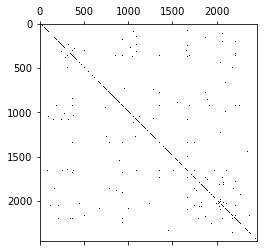

In [5]:
plt.spy(A)
plt.savefig('邻接矩阵.svg')

邻接矩阵对称，无向图

In [6]:
print(np.diag(sum(A)))

[[ 4  0  0 ...  0  0  0]
 [ 0 12  0 ...  0  0  0]
 [ 0  0 21 ...  0  0  0]
 ...
 [ 0  0  0 ... 10  0  0]
 [ 0  0  0 ...  0  8  0]
 [ 0  0  0 ...  0  0  0]]


In [9]:
#L=D-A
L = np.add(np.diag(sum(A)) ,  -1*(A) ) # 计算拉普拉斯算子
#S=L
p21=graphFT.GFT(L)#计算图傅里叶变换

In [10]:
L

array([[ 3,  0,  0, ...,  0,  0,  0],
       [ 0, 12,  0, ...,  0,  0,  0],
       [ 0,  0, 21, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 10,  0,  0],
       [ 0,  0,  0, ...,  0,  8,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int16)

In [28]:
L.shape

(2458, 2458)

In [18]:
#part2.2
eigs,V=np.linalg.eig(L)
#特征性向量
V=V[:,np.argsort(eigs)]
#特征值
eigs=np.sort(eigs)
print(eigs.real)
print(eigs.real.shape)
print(V.real)
print(V.real.shape)

[-4.25248865e-14 -2.31933913e-14 -1.96713032e-14 ...  1.68053344e+02
  1.69102421e+02  1.77275882e+02]
(2458,)
[[-4.50449978e-03 -1.35480593e-02 -2.98544883e-03 ... -1.17236710e-04
   5.86171411e-03 -5.93945908e-04]
 [-4.50449978e-03 -1.35480593e-02 -2.98544883e-03 ...  3.32235274e-07
   6.86848092e-03  5.02827225e-03]
 [-4.50449978e-03 -1.35480593e-02 -2.98544883e-03 ...  6.15972844e-03
  -1.65797475e-04 -7.87684884e-04]
 ...
 [-4.50449978e-03 -1.35480593e-02 -2.98544883e-03 ... -1.09939038e-04
   1.54744824e-05  1.90789773e-05]
 [-4.50449978e-03 -1.35480593e-02 -2.98544883e-03 ... -3.70413985e-04
  -2.39347615e-04 -1.80182417e-04]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
(2458, 2458)


In [37]:
V.real[0]

array([-0.0045045 , -0.01354806, -0.00298545, ..., -0.00011724,
        0.00586171, -0.00059395])

In [39]:
#每个特征向量的总变差
TVG=[]
for i in range(len(V.real)):
    TVG.append(p21.computeTotalVariation(V.real[i]))
print('The Total Variation is:',TVG)

The Total Variation is: [7.638342817631196, 22.537023974995762, 16.460670299907463, 8.981747050068918, 79.47471014091337, 28.374077313611263, 117.39059136635225, 9.886323442223858, 8.671344429869594, 7.54426133162951, 42.62100162215758, 8.138958278773881, 83.64194611229937, 5.209853535759529, 9.437608615909745, 6.7709737204949025, 36.71721154676009, 2.3712000134817997, 5.2447980800342044, 4.629291263397124, 6.558343903000626, 35.58895216448372, 2.7697837890177697, 7.892444066062588, 17.692918070022404, 7.889678311235716, 113.93222754625307, 6.1332084424296855, 7.879186893884905, 8.447532730810073, 7.031163412367575, 5.7957001271323, 6.555408812582251, 29.146055122548276, 8.54028646326315, 11.79104023901458, 5.479190699741458, 27.624311213748083, 6.117082561045422, 62.517503091278684, 6.837080436300417, 23.611923852170925, 4.896362896453336, 11.22686261629415, 2.9801475993923416, 6.181356324827059, 8.316646709293618, 3.698978033004333, 14.615368208023003, 12.489180589498353, 9.970386468

In [41]:
len(TVG)

2458

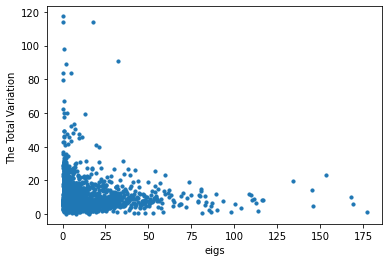

In [234]:
x_axis_data = eigs.real #x
y_axis_data = TVG#y


plt.scatter(x_axis_data, y_axis_data,s=10)#'bo-'表示蓝色实线，数据点实心原点标注
## plot中参数的含义分别是横轴值，纵轴值，线的形状，颜色，透明度,线的宽度和标签 ，

plt.xlabel('eigs') #x_label
plt.ylabel('The Total Variation ')#y_label
 
#plt.ylim(-10,10)#仅设置y轴坐标范围
#plt.xlim(-5,5)
plt.savefig('总变差.svg')
plt.show()


In [49]:
#part3
datafile1 = 'signal_mutation.mat'    #相对路径
gs = sio.loadmat(datafile1)
sorted(gs.keys())

['__globals__', '__header__', '__version__', 'signal_mutation']

In [50]:
X=gs['signal_mutation']
print(X)
print(X.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(240, 2458)


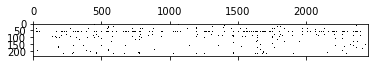

In [52]:
plt.spy(X)
plt.savefig('遗传图谱.svg')

240x2458。矩阵的第i行表示对于第i个病人的遗传图谱xi。如果xi的第n项发生突变，则该患者的第n个基因发生突变为1，如果第n项为0则不发生变化(正常)。

In [53]:
datafile2 = 'histology_subtype.mat'    #相对路径
vector = sio.loadmat(datafile2)
sorted(vector.keys())

['__globals__', '__header__', '__version__', 'histology_subtype']

In [54]:
#患者表型
#如果患者i是浆液型卵巢癌，第i个元素为1，如果患者i是子宫内膜样亚型卵巢癌，第i个元素为2。
#我们的目标是基于傅立叶图分析更好地区分这两种亚型的患者。
y=vector['histology_subtype']
print(y)
print(y.shape)

[[1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [1]
 [2]
 [1]
 [2]
 [2]
 [2]
 [2]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [1]
 [1]
 [2]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [1]
 [2]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [1]
 [2]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]


In [55]:
y.T

array([[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
        2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2,
        1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
      dtype=uint8)

In [56]:
len(X)

240

In [57]:
X[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [58]:
len(X[0])

2458

In [59]:
p31=graphFT.GFT(L)#计算图傅里叶变换
xi=[]
for i in range(len(X)):
    #for j in range(len(X[i])):
    xi.append(p31.computeGFT(X[i]))
#return xi

In [60]:
xi

[array([-0.063063  +0.j, -0.18967283+0.j, -0.04179628+0.j, ...,
        -0.99232927+0.j,  0.00757426+0.j,  0.08786183+0.j]),
 array([-0.51801747+0.j, -1.55802682+0.j, -0.34332662+0.j, ...,
         0.03645053+0.j,  0.04756128+0.j,  0.02189031+0.j]),
 array([-0.34684648+0.j, -1.04320057+0.j, -0.22987956+0.j, ...,
         0.06111318+0.j,  0.03809409+0.j,  0.04783376+0.j]),
 array([-0.69767452+0.j, -1.82230151+0.j, -0.43833037+0.j, ...,
         0.08709712+0.j,  0.07835294+0.j,  0.03593012+0.j]),
 array([-2.70269987e-02+0.j, -8.12883558e-02+0.j, -1.79126930e-02+0.j, ...,
         5.90545667e-03+0.j, -3.17356397e-05+0.j, -7.51206228e-04+0.j]),
 array([-0.036036  +0.j, -0.10838447+0.j, -0.02388359+0.j, ...,
         0.01154598+0.j, -0.00484174+0.j, -0.00231285+0.j]),
 array([-0.54452153+0.j, -1.36166749+0.j, -0.33682511+0.j, ...,
         0.0825521 +0.j,  0.0490066 +0.j,  0.04379757+0.j]),
 array([-0.19369349+0.j, -0.58256655+0.j, -0.1283743 +0.j, ...,
         0.07725492+0.j, -0.9712533 +

In [61]:
len(xi)

240

In [62]:
print(p31.computeGFT(X[1]))

[-0.51801747+0.j -1.55802682+0.j -0.34332662+0.j ...  0.03645053+0.j
  0.04756128+0.j  0.02189031+0.j]


In [63]:
len(xi[i])

2458

In [64]:
import itertools

In [65]:
def all_np(arr):
	#拼接数组函数
    List = list(itertools.chain.from_iterable(arr))
    arr = np.array(List)
    #去除重复数字
    key = np.unique(arr)
    result = {}
    for k in key:
        mask = (arr == k)
        arr_new = arr[mask]
        v = arr_new.size
        result[k] = v
    return result

In [66]:
all_np(y)

{1: 44, 2: 196}

In [67]:
List = list(itertools.chain.from_iterable(y))
arr = np.array(List)
key = np.unique(arr)

mask1 = (arr == 1)
arr_new = arr[mask1]
y1= arr_new.size

mask2 = (arr == 2)
arr_new2 = arr[mask2]
y2=arr_new2.size
print (y1)
print (y2)

44
196


In [68]:
a=[i for i,w in enumerate(arr)if w==1]
print(a)

[0, 17, 25, 27, 32, 33, 34, 35, 38, 39, 44, 45, 70, 71, 74, 75, 76, 77, 78, 79, 92, 110, 111, 118, 139, 145, 147, 176, 185, 187, 200, 201, 207, 228, 229, 231, 232, 233, 234, 235, 236, 237, 238, 239]


In [69]:
b=[j for j,h in enumerate(arr)if h==2]
print(b)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 26, 28, 29, 30, 31, 36, 37, 40, 41, 42, 43, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 72, 73, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 112, 113, 114, 115, 116, 117, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 140, 141, 142, 143, 144, 146, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 177, 178, 179, 180, 181, 182, 183, 184, 186, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 202, 203, 204, 205, 206, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 230]


In [70]:
#所有相加
if __name__ == '__main__':
    result = []
    for i in range(len(xi)):
        for j in range(len(xi[i])):
            if len(result) == 0:
                result = [0] * len(xi[i])
            if xi[i][j]:
                result[j] =result[j] + abs(xi[i][j])
                # print(arr[i][j])

    print(result)

[120.37737254251914, 309.65521909632446, 81.0008260847457, 22.849532651428525, 11.706530064795619, 19.22542129115777, 10.0, 5.0, 5.0, 6.0, 7.0, 4.0, 4.0, 5.0, 5.0, 13.0, 3.0, 18.0, 3.0, 8.0, 8.0, 9.0, 5.0, 5.0, 3.0, 11.0, 4.0, 13.0, 22.630408089702822, 20.26766768618287, 21.21966517597376, 7.312149344796753, 25.139588328611232, 27.167586983155402, 17.893147683049758, 17.90046779265554, 17.543181600862255, 39.93478540700713, 12.194057685413084, 14.47598499151431, 32.8775219064484, 17.78364404652798, 26.88093539038252, 24.474870840486265, 23.866636052065633, 25.54891140956252, 27.078881214341372, 19.95265629899439, 17.67587506581341, 27.84711164121193, 36.16752533994205, 31.000876206945883, 23.14538046210419, 38.272739941295825, 22.74928894045088, 23.94541165969462, 15.191986926204297, 23.07305079015333, 27.203789451612327, 19.06241052852637, 24.830310070820754, 21.65696949174061, 30.77229434275748, 25.421530894315193, 44.807242109594775, 24.226325117126525, 28.25132274315354, 15.3820833

In [71]:
len(result)

2458

In [72]:
if __name__ == '__main__':
    result1 = []
    for i in a:
        for j in range(len(xi[i])):
            if len(result1) == 0:
                result1 = [0] * len(xi[i])
            if xi[i][j]:
                result1[j] = result1[j] + xi[i][j]
                # print(arr[i][j])

    print(result1)

[(-5.6411315827798045+0j), (-14.351876073845501+0j), (-4.1019001441356995+0j), (-0.9194534295101524+0j), (0.5110084692054705+0j), (-0.26361755899818146+0j), 0, 0, 0, 0, (1+0j), 0, (1+0j), 0, 0, 0, 0, 0, 0, (2+0j), (1+0j), 0, 0, 0, 0, (1+0j), 0, (1+0j), (-1.172160059835671+0j), (-0.13011236323660144+0j), (0.21175635491263486+0j), (-0.0828821713932147+0j), (0.7255871059715221+0j), (0.2679344041790671+0j), (0.2368664414423638+0j), (-0.08600640093147656+0j), (-0.44764599396563176+0j), (-3.3396151781779886+0j), (0.4058365477874113+0j), (-0.8120112850717603+0j), (-2.278019966006275+0j), (0.1698692383856173+0j), (-1.2072711564996343+0j), (-1.3841414712927396+0j), (0.8631579222028136+0j), (-0.7180043060005137+0j), (-0.008122420743221254+0j), (-0.4917186306404068+0j), (-0.5422726942596217+0j), (0.3641009373297303+0j), (-3.68887735868093+0j), (-0.4820872239942941+0j), (0.48536049001184955+0j), (1.1966301370699788+0j), (-1.679637151869024+0j), (0.8053098214164158+0j), (-0.868730893390544+0j), (1.

In [73]:
len(result1)


2458

In [74]:
result1[1]

(-14.351876073845501+0j)

In [75]:
if __name__ == '__main__':
    result2 = []
    for i in b:
        for j in range(len(xi[i])):
            if len(result2) == 0:
                result2 = [0] * len(xi[i])
            if xi[i][j]:
                result2[j] = result2[j] + xi[i][j]
                # print(arr[i][j])

    print(result2)

[(-114.55184383823604+0j), (-293.33899686439815+0j), (-76.89892594060997+0j), (-0.7235617456957864+0j), (6.490867025665684+0j), (15.791456068205013+0j), (10+0j), (5+0j), (5+0j), (6+0j), (6+0j), (4+0j), (3+0j), (5+0j), (5+0j), (13+0j), (3+0j), (18+0j), (3+0j), (6+0j), (7+0j), (9+0j), (5+0j), (5+0j), (3+0j), (10+0j), (4+0j), (12+0j), (-20.37970588207098+0j), (-19.303459303884466+0j), (21.007908821061122+0j), (3.4992040527761716+0j), (5.869172048230936+0j), (2.666899970492832+0j), (8.153618100028872+0j), (-1.6499416996281728+0j), (-7.119120481410054+0j), (-22.937555648531774+0j), (2.833951394560191+0j), (-8.411962577852117+0j), (-14.215193626389295+0j), (3.8315566684337776+0j), (-0.346887914741285+0j), (-8.026118243216388+0j), (2.1847678243383104+0j), (3.5224848718198296+0j), (-4.973117497080985+0j), (1.8749056942943365+0j), (1.0862537743163667+0j), (17.038840599610186+0j), (-14.249049418826045+0j), (11.323203595794764+0j), (5.206244551527527+0j), (25.140176467051347+0j), (-11.65787284112

In [76]:
len(result2)

2458

In [77]:
DPvk=[]
for i in range(len(result)):
    DPvk.append(abs(result1[i]/44-result2[i]/196)/result[i])

In [78]:
print(DPvk)

[0.0037900864360095876, 0.003779844359671655, 0.0036927580873299536, 0.0007529706430015516, 0.001836824365008013, 0.004502370078520454, 0.00510204081632653, 0.00510204081632653, 0.00510204081632653, 0.00510204081632653, 0.0011264245958123506, 0.00510204081632653, 0.001855287569573284, 0.00510204081632653, 0.00510204081632653, 0.00510204081632653, 0.00510204081632653, 0.00510204081632653, 0.00510204081632653, 0.001855287569573284, 0.001623376623376623, 0.00510204081632653, 0.00510204081632653, 0.00510204081632653, 0.00510204081632653, 0.00257210322145387, 0.00510204081632653, 0.0029613243898958183, 0.0034174412396188467, 0.004713415454575185, 0.004824325124450964, 0.0026991745770955657, 0.0005351773914291833, 0.0002766978985059782, 0.002024057744004157, 0.0003610731876210052, 0.0014905090352075635, 0.001029879083305732, 0.00042933844642501255, 0.0016899281464096538, 0.0006312311830337596, 0.0008821641932670201, 0.0009548828624103713, 0.00038781909102674503, 0.0003549076154745872, 0.0013

In [79]:
max(DPvk)

0.00997546645087397

In [80]:
min(DPvk)

1.8679133110718665e-15

In [81]:
len(DPvk)

2458

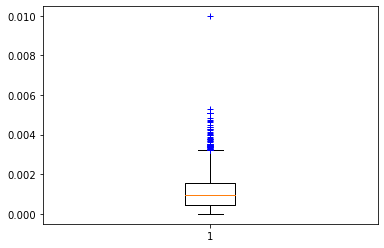

In [235]:
plt.boxplot(DPvk, sym='b+')
plt.savefig('箱线图.svg')

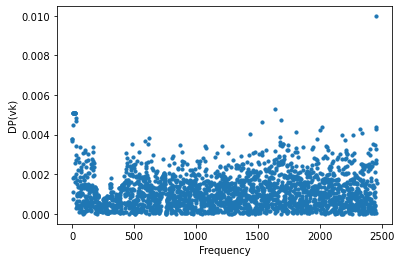

In [237]:
x_values=range(len(DPvk))
y_values=DPvk
fig,ax=plt.subplots()
ax.scatter(x_values,y_values,marker='o',s=10)
ax.set_xlabel("Frequency",fontsize=10)
ax.set_ylabel("DP(vk)",fontsize=10)
plt.savefig('DP(vk).svg')
plt.show()

In [86]:
#part 4.1
#交叉验证得分
from sklearn.model_selection  import cross_val_score
#kNN分类算法
from sklearn.neighbors import KNeighborsClassifier
#分割训练集与测试集
from sklearn.model_selection import train_test_split


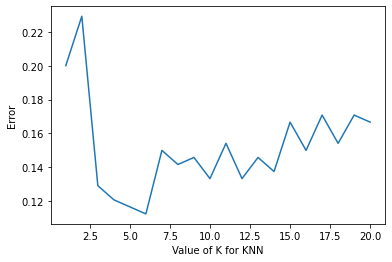

In [238]:
#k-邻居个数
k_range = range(1,21)
k_error = []
#循环，取k=1到k=20，查看误差效果
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    #cv参数决定数据集划分比例，这里是按照4:1划分训练集和测试集
    sc = cross_val_score(knn, X, y.ravel(), cv=10, scoring='accuracy')
    k_error.append(1 - sc.mean())

#画图，x轴为k值，y值为误差值
plt.plot(k_range, k_error)
plt.xlabel('Value of K for KNN')
plt.ylabel('Error')
plt.savefig('k取值.svg')
plt.show()


In [239]:
#调用sklearn库KNN预测结果
# X为数据集数据;y为样本标签
#分割数据集，比例为 训练集：测试集 = 8:2
X_train,X_test,y_train,y_test=train_test_split(X,y.ravel(),test_size=0.2,random_state=0)
#构建knn分类模型，并指定 k 值

for n_neighbors in [3,5,7]:
    KNN=KNeighborsClassifier(n_neighbors=n_neighbors,algorithm='brute',metric='euclidean')
    #使用训练集训练模型
    KNN.fit(X_train,y_train)
    #评估模型的得分
    #score=cross_val_score(KNN,X_train,y_train,cv=5).mean()
    sco=KNN.score(X_test,y_test)
    y_predict = KNN.predict(X_test)
    print(sco)

0.8541666666666666
0.7916666666666666
0.8958333333333334


In [240]:
y_predict

array([2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2,
       2, 2, 2, 2], dtype=uint8)

In [241]:
y_test

array([2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2,
       2, 2, 2, 2], dtype=uint8)

In [242]:
from collections import Counter
import statistics

In [243]:
#自己实现留一交叉验证
class my_knn():
    def __init__(self,X,y,k=None):
       #Z：特征训练集
       #y：标签训练集
       #k：邻近值
        self.X = X
        self.y = y
        self.k = k

    def solve(self):
         #计算欧式距离
        #ssd.squareform()将这个向量转换成矩阵形式
        d = ssd.squareform(ssd.pdist(self.X, 'euclidean'))
        
        #select the nearest neighbors
        # 按照从小到大排序,返回下标
        nn = d.argsort(axis=0)
        #取列表中第1项（从0数起）到k+1项，每隔1个值（从1数起）取一次值
        #返回标签值{1，2}
        nn_label= self.y[nn [1:(self.k+1),:]]
        #三维变二维
        nn_l=np.reshape(nn_label,(k,240))
       
        y_predict=[]
        for i in range(len(nn_l.T)):
            #mode()返回出现次数最多的标签
             y_predict.append(statistics.mode(nn_l.T[i]))
        return y_predict     
    

In [244]:
#留一
#原图信号矩阵 
accuracy=[]
for k in [3,5,7]:
    k_NN = my_knn(X,y,k=k)
    y_predict = k_NN.solve() 
    accuracy.append(accuracy_score( y,y_predict))
    #print("accuracy:%.3f" % (accuracys))

In [245]:
accuracy= [round(j,3) for j in accuracy]
print(accuracy)

[0.875, 0.879, 0.871]


In [246]:
def l2_distance(a,b):   #l2距离为欧式距离。a可以是一个矩阵,b必须为行向量
    return np.sqrt(np.sum((a-b)**2,axis=1))   #axis=1表示把每一行加起来，将结果保存成一列

In [247]:
class kNN():  
    def __init__(self,n_neighbors=1,dist_func=l2_distance):   
        self.n_neighbors=n_neighbors
        self.dist_func=dist_func     
    
    #训练模型方法
    def fit(self,x,y):
        self.x_train=x
        self.y_train=y
    
    #模型预测方法
    def predict(self,x):  #预测不要传y
        #初始化预测分类数组
        #y_pred=np.zeros((x.shape[0],1),dtype=self.y_train.dtype)  
        #np.zeros初始化一个零数组,x.shape[0]行1列
        y_pred=[]
        #遍历输入的x数据点，取出每一个数据点的序号i和数据x_test
        for i,x_test in enumerate(x):   #i为测试点的序号，保存到对应的预测y值中。
            #enumerate枚举，拿出来的是元组，前面是序号，后面是值
            #x_test跟所有训练数据计算距离
            distances=self.dist_func(self.x_train,x_test)
            #得到的距离按照由近到远排序，取出索引值
            nn_index=np.argsort(distances)
            #选取最近的k个点，保存它们对应的分类类别
            nn_y=self.y_train[nn_index[:self.n_neighbors+1]].ravel()#n个近邻对应的y值（类别）
            #统计类别出现频率最高的那个，赋给y_pred[i]
            #y_pred[i]=np.argmax(np.bincount(nn_y)) 
            #bincount统计nn_y中每个数出现的次数，也是输出一个数组
            y_pred.append(np.argmax(np.bincount(nn_y)))
        return y_pred


In [248]:
#十折交叉验证
Xt=np.array(X)
yt=np.array(y)

kf=KFold(n_splits=10, shuffle=False, random_state=None)
for train_index, test_index in kf.split(Xt,yt):
        X_train, X_test = Xt[train_index], Xt[test_index]
        y_train, y_test = yt[train_index], yt[test_index]
        print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [ 24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41
  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59
  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131
 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149
 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239] TEST: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
TRAIN: [  0   1   2   3   4   5   6 

In [249]:
#自定kNN
my_scores=[]
i = 1
for train_index, test_index in kf.split(Xt, yt):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index]
    my_score=[]
    for k in [3,5,7]:
        model = kNN(n_neighbors=k)
        model.fit(X_train, y_train.ravel())
        pred_test = model.predict(X_test)
        my_score.append(1-accuracy_score(y_test, pred_test))
    my_scores.append(my_score)    
    print('accuracy_score', my_score)
    i += 1


1 of kfold 10
accuracy_score [0.04166666666666663, 0.04166666666666663, 0.04166666666666663]

2 of kfold 10
accuracy_score [0.16666666666666663, 0.16666666666666663, 0.29166666666666663]

3 of kfold 10
accuracy_score [0.125, 0.16666666666666663, 0.125]

4 of kfold 10
accuracy_score [0.125, 0.20833333333333337, 0.25]

5 of kfold 10
accuracy_score [0.20833333333333337, 0.125, 0.08333333333333337]

6 of kfold 10
accuracy_score [0.125, 0.04166666666666663, 0.04166666666666663]

7 of kfold 10
accuracy_score [0.125, 0.16666666666666663, 0.08333333333333337]

8 of kfold 10
accuracy_score [0.04166666666666663, 0.04166666666666663, 0.08333333333333337]

9 of kfold 10
accuracy_score [0.16666666666666663, 0.04166666666666663, 0.04166666666666663]

10 of kfold 10
accuracy_score [0.29166666666666663, 0.29166666666666663, 0.41666666666666663]


In [250]:
my_scores

[[0.04166666666666663, 0.04166666666666663, 0.04166666666666663],
 [0.16666666666666663, 0.16666666666666663, 0.29166666666666663],
 [0.125, 0.16666666666666663, 0.125],
 [0.125, 0.20833333333333337, 0.25],
 [0.20833333333333337, 0.125, 0.08333333333333337],
 [0.125, 0.04166666666666663, 0.04166666666666663],
 [0.125, 0.16666666666666663, 0.08333333333333337],
 [0.04166666666666663, 0.04166666666666663, 0.08333333333333337],
 [0.16666666666666663, 0.04166666666666663, 0.04166666666666663],
 [0.29166666666666663, 0.29166666666666663, 0.41666666666666663]]

In [251]:
my_scores=np.mean(my_scores, axis=0)

In [252]:
my_scores

array([0.14166667, 0.12916667, 0.14583333])

In [253]:
X_train.shape

(216, 2458)

In [254]:
#sklearn
#计算准确率
scores=[]
for n_neighbors in [3,5,7]:
    mol=KNeighborsClassifier(n_neighbors=n_neighbors )
    scores.append(cross_val_score(mol,Xt,yt.ravel(),cv=kf))

In [255]:
scores

[array([0.91666667, 0.79166667, 0.83333333, 0.75      , 0.91666667,
        0.91666667, 0.95833333, 0.95833333, 0.875     , 0.625     ]),
 array([1.        , 0.79166667, 0.83333333, 0.79166667, 0.875     ,
        0.95833333, 0.875     , 0.95833333, 0.91666667, 0.75      ]),
 array([0.95833333, 0.66666667, 0.83333333, 0.75      , 0.95833333,
        0.95833333, 0.91666667, 0.91666667, 0.95833333, 0.58333333])]

In [256]:
#计算平均错误率
error=[]
for i in range(3):
    error.append(1-scores[i].mean())
print(error)

[0.14583333333333326, 0.125, 0.15000000000000002]


In [257]:
error= [round(j,3) for j in error]
print(error)

[0.146, 0.125, 0.15]


In [258]:
#十折误差
my_error=[]
for i in range(3):
    my_error.append(1-scores[i])
my_error_max=np.max(my_error,axis=1)
my_error_min=np.min(my_error,axis=1)

In [259]:
my_error_max

array([0.375     , 0.25      , 0.41666667])

In [260]:
my_error_min

array([0.04166667, 0.        , 0.04166667])

In [261]:
my_error

[array([0.08333333, 0.20833333, 0.16666667, 0.25      , 0.08333333,
        0.08333333, 0.04166667, 0.04166667, 0.125     , 0.375     ]),
 array([0.        , 0.20833333, 0.16666667, 0.20833333, 0.125     ,
        0.04166667, 0.125     , 0.04166667, 0.08333333, 0.25      ]),
 array([0.04166667, 0.33333333, 0.16666667, 0.25      , 0.04166667,
        0.04166667, 0.08333333, 0.08333333, 0.04166667, 0.41666667])]

# 第一个滤波器

In [262]:
np.argmax(DPvk)

2455

In [263]:
#滤波频率响应
hk=np.zeros((len(DPvk),),dtype=int,order = 'C')
hk[np.argmax(DPvk)]=1

In [264]:
hk

array([0, 0, 0, ..., 1, 0, 0])

In [265]:
#通过滤波器处理
xif=xi*hk
#经计算iGFT，过滤后的图信号矩阵
iGFT=[]
for i in range(len(xif)):
    iGFT.append(p31.computeiGFT(xif[i]))   

In [266]:
xif

array([[-0.        +0.j, -0.        +0.j, -0.        +0.j, ...,
        -0.99232927+0.j,  0.        +0.j,  0.        +0.j],
       [-0.        +0.j, -0.        +0.j, -0.        +0.j, ...,
         0.03645053+0.j,  0.        +0.j,  0.        +0.j],
       [-0.        +0.j, -0.        +0.j, -0.        +0.j, ...,
         0.06111318+0.j,  0.        +0.j,  0.        +0.j],
       ...,
       [-0.        +0.j, -0.        +0.j, -0.        +0.j, ...,
        -0.9859402 +0.j, -0.        +0.j,  0.        +0.j],
       [-0.        +0.j, -0.        +0.j, -0.        +0.j, ...,
        -0.98520387+0.j, -0.        +0.j,  0.        +0.j],
       [-0.        +0.j, -0.        +0.j, -0.        +0.j, ...,
        -0.99100892+0.j,  0.        +0.j,  0.        +0.j]])

In [267]:
xif.shape

(240, 2458)

In [268]:
np.array(iGFT).shape

(240, 2458)

In [269]:
np.array(iGFT).real

array([[ 1.16337419e-04, -3.29686788e-07, -6.11247884e-03, ...,
         1.09095726e-04,  3.67572640e-04,  0.00000000e+00],
       [-4.27334039e-06,  1.21101523e-08,  2.24525376e-04, ...,
        -4.00733638e-06, -1.35017866e-05,  0.00000000e+00],
       [-7.16470805e-06,  2.03039538e-08,  3.76440587e-04, ...,
        -6.71872413e-06, -2.26371762e-05,  0.00000000e+00],
       ...,
       [ 1.15588386e-04, -3.27564114e-07, -6.07312391e-03, ...,
         1.08393318e-04,  3.65206039e-04,  0.00000000e+00],
       [ 1.15502060e-04, -3.27319478e-07, -6.06858830e-03, ...,
         1.08312366e-04,  3.64933291e-04,  0.00000000e+00],
       [ 1.16182626e-04, -3.29248122e-07, -6.10434586e-03, ...,
         1.08950568e-04,  3.67083565e-04,  0.00000000e+00]])

In [120]:
#留一
#经过滤波器后准确率
acc=[]
for k in [3,5,7]:
    k_NN2 = my_knn(np.array(iGFT).real,y,k=k)
    y_predict2 = k_NN2.solve() 
    acc.append(accuracy_score( y,y_predict2))
    #print("accuracy:%.3f" % (accuracys))

In [121]:
#最大频率
acc= [round(j,3) for j in acc]
print(acc)

[0.9, 0.888, 0.892]


In [122]:
#自定kNN
my_scores0=[]
i = 1
for train_index, test_index in kf.split(np.array(iGFT).real,yt):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    X_train, X_test = np.array(iGFT).real[train_index], np.array(iGFT).real[test_index] 
    y_train, y_test = yt[train_index], yt[test_index]
    my_score=[]
    for k in [3,5,7]:
        model = kNN(n_neighbors=k)
        model.fit(X_train, y_train.ravel())
        pred_test = model.predict(X_test)
        my_score.append(1-accuracy_score(y_test, pred_test))
    my_scores0.append(my_score)    
    print('accuracy_score', my_score)
    i += 1


1 of kfold 10
accuracy_score [0.04166666666666663, 0.04166666666666663, 0.04166666666666663]

2 of kfold 10
accuracy_score [0.20833333333333337, 0.125, 0.08333333333333337]

3 of kfold 10
accuracy_score [0.125, 0.08333333333333337, 0.125]

4 of kfold 10
accuracy_score [0.04166666666666663, 0.125, 0.125]

5 of kfold 10
accuracy_score [0.04166666666666663, 0.08333333333333337, 0.08333333333333337]

6 of kfold 10
accuracy_score [0.08333333333333337, 0.125, 0.08333333333333337]

7 of kfold 10
accuracy_score [0.25, 0.20833333333333337, 0.16666666666666663]

8 of kfold 10
accuracy_score [0.08333333333333337, 0.125, 0.16666666666666663]

9 of kfold 10
accuracy_score [0.08333333333333337, 0.08333333333333337, 0.04166666666666663]

10 of kfold 10
accuracy_score [0.04166666666666663, 0.08333333333333337, 0.08333333333333337]


In [123]:
my_scores0

[[0.04166666666666663, 0.04166666666666663, 0.04166666666666663],
 [0.20833333333333337, 0.125, 0.08333333333333337],
 [0.125, 0.08333333333333337, 0.125],
 [0.04166666666666663, 0.125, 0.125],
 [0.04166666666666663, 0.08333333333333337, 0.08333333333333337],
 [0.08333333333333337, 0.125, 0.08333333333333337],
 [0.25, 0.20833333333333337, 0.16666666666666663],
 [0.08333333333333337, 0.125, 0.16666666666666663],
 [0.08333333333333337, 0.08333333333333337, 0.04166666666666663],
 [0.04166666666666663, 0.08333333333333337, 0.08333333333333337]]

In [124]:
my_scores0=np.mean(my_scores0, axis=0)

In [125]:
my_scores0

array([0.1       , 0.10833333, 0.1       ])

In [126]:
#sklearn
scores0=[]
for n_neighbors in [3,5,7]:
    mol=KNeighborsClassifier(n_neighbors=n_neighbors )
    scores0.append(cross_val_score(mol,np.array(iGFT).real,yt.ravel(),cv=kf))

In [127]:
scores0

[array([0.95833333, 0.83333333, 0.91666667, 0.91666667, 1.        ,
        0.875     , 0.79166667, 0.91666667, 0.91666667, 0.91666667]),
 array([0.95833333, 0.79166667, 0.91666667, 0.91666667, 0.91666667,
        0.875     , 0.79166667, 0.875     , 0.91666667, 0.875     ]),
 array([0.95833333, 0.91666667, 0.91666667, 0.83333333, 0.91666667,
        0.91666667, 0.83333333, 0.875     , 0.95833333, 0.91666667])]

In [128]:
for i in range(3):
    scores0[i].mean()
    print(scores0[i].mean())

0.9041666666666666
0.8833333333333332
0.9041666666666666


In [129]:
#计算错误率
error0=[]
for i in range(3):
    error0.append(1-scores0[i].mean())
print(error0)

[0.09583333333333344, 0.11666666666666681, 0.09583333333333344]


In [130]:
error0= [round(j,3) for j in error0]
print(error0)

[0.096, 0.117, 0.096]


In [131]:
#十折误差
my_error0=[]
for i in range(3):
    my_error0.append(1-scores0[i])
my_error_max0=np.max(my_error0,axis=1)
my_error_min0=np.min(my_error0,axis=1)

# 第二个滤波器

In [132]:
pd.Series(DPvk).sort_values(ascending=False)

2455    9.975466e-03
1638    5.285256e-03
22      5.102041e-03
26      5.102041e-03
24      5.102041e-03
            ...     
508     2.271483e-06
2346    1.661119e-06
1266    2.347192e-07
1052    1.300071e-07
2362    1.867913e-15
Length: 2458, dtype: float64

In [133]:
# 对list数组元素进行排序  ascending=False从大到小
#pd.Series().sort_values(ascending=False)
pk=[]
for p in [0.75,0.8,0.85,0.9,0.95]:
    n=round((len(DPvk))*(1-p))
# 选取list数组元素中最大的n个值的索引
    pk.append(pd.Series(DPvk).sort_values(ascending=False).index[:n])

In [134]:
pk

[Int64Index([2455, 1638,   22,   26,   24,   23,   21,   18,   17,   16,
             ...
             1586, 1285, 2292, 1059,  462, 1147, 1220, 2093, 2368, 1556],
            dtype='int64', length=614),
 Int64Index([2455, 1638,   22,   26,   24,   23,   21,   18,   17,   16,
             ...
             1334, 2067, 1233, 2274, 1464, 1983, 2452,  950,  448, 1939],
            dtype='int64', length=492),
 Int64Index([2455, 1638,   22,   26,   24,   23,   21,   18,   17,   16,
             ...
              478, 1971, 2115, 1178,  467,  958, 1668,  990, 1970,  173],
            dtype='int64', length=369),
 Int64Index([2455, 1638,   22,   26,   24,   23,   21,   18,   17,   16,
             ...
             2199, 2347, 1592,  854,  471, 1367, 1319,  645, 2394,  496],
            dtype='int64', length=246),
 Int64Index([2455, 1638,   22,   26,   24,   23,   21,   18,   17,   16,
             ...
             1951,   49,  441, 2061,  802, 1053, 2211, 1968, 1642, 2205],
            dtype='i

In [135]:
pk[0]

Int64Index([2455, 1638,   22,   26,   24,   23,   21,   18,   17,   16,
            ...
            1586, 1285, 2292, 1059,  462, 1147, 1220, 2093, 2368, 1556],
           dtype='int64', length=614)

In [136]:
#滤波器实现
hp=np.zeros((5,2458),dtype=int)
for i in range(5):
    for j in pk[i]:
        hp[i][j]=1

In [137]:
hp

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 0]])

In [138]:
xip=[]
for i in range(5):
    #通过滤波器
    xip.append(xi*hp[i])    

In [139]:
np.array(xip[4]).shape

(240, 2458)

In [140]:
#p=0.75
#留一
xip1=xi*hp[1]
#计算iGFT，过滤后的图信号矩阵
iGFT1=[]
for i in range(len(xip1)):
    iGFT1.append(p31.computeiGFT(xip1[i]))  
accuracys1=[]
#经过滤波器后准确率
for k in [3,5,7]:
    k_NN2 = my_knn(np.array(iGFT1).real,y,k=k)
    y_predict2 = k_NN2.solve() 
    accuracys1.append(accuracy_score( y,y_predict2))
    #print("accuracy:%.3f" % (accuracys))

In [141]:
accuracys1

[0.9166666666666666, 0.9166666666666666, 0.9208333333333333]

In [142]:
#自定kNN
my_scores1=[]
i = 1
for train_index, test_index in kf.split(np.array(iGFT1).real,yt):
    #print('\n{} of kfold {}'.format(i,kf.n_splits))
    X_train, X_test = np.array(iGFT1).real[train_index], np.array(iGFT1).real[test_index] 
    y_train, y_test = yt[train_index], yt[test_index]
    my_score=[]
    for k in [3,5,7]:
        model = kNN(n_neighbors=k)
        model.fit(X_train, y_train.ravel())
        pred_test = model.predict(X_test)
        my_score.append(1-accuracy_score(y_test, pred_test))
    my_scores1.append(my_score)    
    #print('accuracy_score', my_score)
    i += 1

In [143]:
my_scores1

[[0.08333333333333337, 0.04166666666666663, 0.04166666666666663],
 [0.16666666666666663, 0.16666666666666663, 0.16666666666666663],
 [0.08333333333333337, 0.08333333333333337, 0.08333333333333337],
 [0.125, 0.125, 0.125],
 [0.08333333333333337, 0.08333333333333337, 0.08333333333333337],
 [0.04166666666666663, 0.04166666666666663, 0.04166666666666663],
 [0.08333333333333337, 0.16666666666666663, 0.125],
 [0.04166666666666663, 0.04166666666666663, 0.04166666666666663],
 [0.0, 0.0, 0.0],
 [0.04166666666666663, 0.08333333333333337, 0.04166666666666663]]

In [144]:
my_scores1=np.mean(my_scores1, axis=0)

In [145]:
my_scores1

array([0.075     , 0.08333333, 0.075     ])

In [146]:
#sklearn
scores1=[]
for n_neighbors in [3,5,7]:
    mol=KNeighborsClassifier(n_neighbors=n_neighbors )
    scores1.append(cross_val_score(mol,np.array(iGFT1).real,yt.ravel(),cv=kf))

In [147]:
scores1

[array([0.95833333, 0.83333333, 0.91666667, 0.875     , 0.95833333,
        0.95833333, 0.875     , 0.91666667, 1.        , 0.875     ]),
 array([0.95833333, 0.83333333, 0.91666667, 0.875     , 0.95833333,
        0.95833333, 0.875     , 0.91666667, 1.        , 0.91666667]),
 array([0.95833333, 0.83333333, 0.91666667, 0.875     , 0.95833333,
        0.95833333, 0.875     , 0.91666667, 1.        , 0.91666667])]

In [148]:
for i in range(3):
    print(scores1[i].mean())

0.9166666666666666
0.9208333333333332
0.9208333333333332


In [149]:
#计算平均错误率
error1=[]
for i in range(3):
    error1.append(1-scores1[i].mean())
print(error1)

[0.08333333333333337, 0.07916666666666683, 0.07916666666666683]


In [150]:
error1= [round(j,3) for j in error1]
print(error1)

[0.083, 0.079, 0.079]


In [151]:
#十折误差
my_error1=[]
for i in range(3):
    my_error1.append(1-scores1[i])
my_error_max1=np.max(my_error1,axis=1)
my_error_min1=np.min(my_error1,axis=1)

In [152]:
#p=0.8
xip2=xi*hp[1]
#计算iGFT，过滤后的图信号矩阵
iGFT2=[]
for i in range(len(xip2)):
    iGFT2.append(p31.computeiGFT(xip2[i]))  
accuracys2=[]
#经过滤波器后准确率
for k in [3,5,7]:
    k_NN2 = my_knn(np.array(iGFT2).real,y,k=k)
    y_predict2 = k_NN2.solve() 
    accuracys2.append(accuracy_score( y,y_predict2))
    #print("accuracy:%.3f" % (accuracys))

In [153]:
#自定kNN
my_scores2=[]
i = 1
for train_index, test_index in kf.split(np.array(iGFT2).real,yt):
    #print('\n{} of kfold {}'.format(i,kf.n_splits))
    X_train, X_test = np.array(iGFT2).real[train_index], np.array(iGFT2).real[test_index] 
    y_train, y_test = yt[train_index], yt[test_index]
    my_score=[]
    for k in [3,5,7]:
        model = kNN(n_neighbors=k)
        model.fit(X_train, y_train.ravel())
        pred_test = model.predict(X_test)
        my_score.append(1-accuracy_score(y_test, pred_test))
    my_scores2.append(my_score)    
    #print('accuracy_score', my_score)
    i += 1

In [154]:
my_scores2=np.mean(my_scores2, axis=0)

In [155]:
my_scores2

array([0.075     , 0.08333333, 0.075     ])

In [156]:
#sklearn
scores2=[]
for n_neighbors in [3,5,7]:
    mol=KNeighborsClassifier(n_neighbors=n_neighbors )
    scores2.append(cross_val_score(mol,np.array(iGFT2).real,yt.ravel(),cv=kf))

In [157]:
scores2

[array([0.95833333, 0.83333333, 0.91666667, 0.875     , 0.95833333,
        0.95833333, 0.875     , 0.91666667, 1.        , 0.875     ]),
 array([0.95833333, 0.83333333, 0.91666667, 0.875     , 0.95833333,
        0.95833333, 0.875     , 0.91666667, 1.        , 0.91666667]),
 array([0.95833333, 0.83333333, 0.91666667, 0.875     , 0.95833333,
        0.95833333, 0.875     , 0.91666667, 1.        , 0.91666667])]

In [158]:
for i in range(3):
    print(scores2[i].mean())

0.9166666666666666
0.9208333333333332
0.9208333333333332


In [159]:
#平均误差
error2=[]
for i in range(3):
    error2.append(1-scores2[i].mean())
print(error2)

[0.08333333333333337, 0.07916666666666683, 0.07916666666666683]


In [160]:
error2= [round(j,3) for j in error2]
print(error2)

[0.083, 0.079, 0.079]


In [161]:
#十折误差
my_error2=[]
for i in range(3):
    my_error2.append(1-scores2[i])
my_error_max2=np.max(my_error2,axis=1)
my_error_min2=np.min(my_error2,axis=1)

In [162]:
#p=0.85
xip3=xi*hp[2]
#计算iGFT，过滤后的图信号矩阵
iGFT3=[]
for i in range(len(xip3)):
    iGFT3.append(p31.computeiGFT(xip3[i]))  
accuracys3=[]
#经过滤波器后准确率
for k in [3,5,7]:
    k_NN2 = my_knn(np.array(iGFT3).real,y,k=k)
    y_predict2 = k_NN2.solve() 
    accuracys3.append(accuracy_score( y,y_predict2))
    #print("accuracy:%.3f" % (accuracys))

In [163]:
#自定kNN
my_scores3=[]
i = 1
for train_index, test_index in kf.split(np.array(iGFT3).real,yt):
    #print('\n{} of kfold {}'.format(i,kf.n_splits))
    X_train, X_test = np.array(iGFT3).real[train_index], np.array(iGFT3).real[test_index] 
    y_train, y_test = yt[train_index], yt[test_index]
    my_score=[]
    for k in [3,5,7]:
        model = kNN(n_neighbors=k)
        model.fit(X_train, y_train.ravel())
        pred_test = model.predict(X_test)
        my_score.append(1-accuracy_score(y_test, pred_test))
    my_scores3.append(my_score)    
    #print('accuracy_score', my_score)
    i += 1


In [164]:
my_scores3=np.mean(my_scores3, axis=0)

In [165]:
my_scores3

array([0.08333333, 0.09583333, 0.08333333])

In [166]:
scores3=[]
for n_neighbors in [3,5,7]:
    mol=KNeighborsClassifier(n_neighbors=n_neighbors )
    scores3.append(cross_val_score(mol,np.array(iGFT3).real,yt.ravel(),cv=kf))

In [167]:
scores3

[array([0.95833333, 0.875     , 0.875     , 0.875     , 0.91666667,
        0.95833333, 0.875     , 0.875     , 1.        , 0.95833333]),
 array([0.95833333, 0.83333333, 0.875     , 0.875     , 0.91666667,
        1.        , 0.83333333, 0.875     , 1.        , 0.95833333]),
 array([0.95833333, 0.83333333, 0.91666667, 0.875     , 0.95833333,
        0.95833333, 0.83333333, 0.875     , 1.        , 0.95833333])]

In [168]:
for i in range(3):
    print(scores3[i].mean())

0.9166666666666667
0.9125000000000002
0.9166666666666666


In [169]:
error3=[]
for i in range(3):
    error3.append(1-scores3[i].mean())
print(error3)

[0.08333333333333326, 0.0874999999999998, 0.08333333333333337]


In [170]:
error3= [round(j,3) for j in error3]
print(error3)

[0.083, 0.087, 0.083]


In [171]:
#十折误差
my_error3=[]
for i in range(3):
    my_error3.append(1-scores3[i])
my_error_max3=np.max(my_error3,axis=1)
my_error_min3=np.min(my_error3,axis=1)

In [172]:
#p=0.9
xip4=xi*hp[3]
#计算iGFT，过滤后的图信号矩阵
iGFT4=[]
for i in range(len(xip4)):
    iGFT4.append(p31.computeiGFT(xip4[i]))  
accuracys4=[]
#经过滤波器后准确率
for k in [3,5,7]:
    k_NN2 = my_knn(np.array(iGFT4).real,y,k=k)
    y_predict2 = k_NN2.solve() 
    accuracys4.append(accuracy_score( y,y_predict2))
    #print("accuracy:%.3f" % (accuracys))

In [173]:
#自定kNN
my_scores4=[]
i = 1
for train_index, test_index in kf.split(np.array(iGFT4).real,yt):
    #print('\n{} of kfold {}'.format(i,kf.n_splits))
    X_train, X_test = np.array(iGFT4).real[train_index], np.array(iGFT4).real[test_index] 
    y_train, y_test = yt[train_index], yt[test_index]
    my_score=[]
    for k in [3,5,7]:
        model = kNN(n_neighbors=k)
        model.fit(X_train, y_train.ravel())
        pred_test = model.predict(X_test)
        my_score.append(1-accuracy_score(y_test, pred_test))
    my_scores4.append(my_score)    
    #print('accuracy_score', my_score)
    i += 1


In [174]:
my_scores4=np.mean(my_scores4, axis=0)

In [175]:
my_scores4

array([0.09166667, 0.08333333, 0.0875    ])

In [176]:
scores4=[]
for n_neighbors in [3,5,7]:
    mol=KNeighborsClassifier(n_neighbors=n_neighbors )
    scores4.append(cross_val_score(mol,np.array(iGFT4).real,yt.ravel(),cv=kf))

In [177]:
scores4

[array([0.95833333, 0.875     , 0.91666667, 0.875     , 0.91666667,
        0.95833333, 0.83333333, 0.875     , 0.95833333, 0.95833333]),
 array([0.95833333, 0.91666667, 0.91666667, 0.875     , 0.91666667,
        0.95833333, 0.83333333, 0.875     , 0.95833333, 0.95833333]),
 array([0.95833333, 0.91666667, 0.91666667, 0.875     , 0.91666667,
        1.        , 0.83333333, 0.875     , 0.95833333, 0.95833333])]

In [178]:
for i in range(3):
    print(scores4[i].mean())

0.9125000000000002
0.9166666666666667
0.9208333333333334


In [179]:
error4=[]
for i in range(3):
    error4.append(1-scores4[i].mean())
print(error4)

[0.0874999999999998, 0.08333333333333326, 0.07916666666666661]


In [180]:
error4= [round(j,3) for j in error4]
print(error4)

[0.087, 0.083, 0.079]


In [181]:
#十折误差
my_error4=[]
for i in range(3):
    my_error4.append(1-scores4[i])
my_error_max4=np.max(my_error4,axis=1)
my_error_min4=np.min(my_error4,axis=1)

In [182]:
#p=0.95
xip5=xi*hp[4]
#计算iGFT，过滤后的图信号矩阵
iGFT5=[]
for i in range(len(xip5)):
    iGFT5.append(p31.computeiGFT(xip5[i]))  
accuracys5=[]
#经过滤波器后准确率
for k in [3,5,7]:
    k_NN2 = my_knn(np.array(iGFT5).real,y,k=k)
    y_predict2 = k_NN2.solve() 
    accuracys5.append(accuracy_score( y,y_predict2))
    #print("accuracy:%.3f" % (accuracys))

In [183]:
#自定kNN
my_scores5=[]
i = 1
for train_index, test_index in kf.split(np.array(iGFT5).real,yt):
    #print('\n{} of kfold {}'.format(i,kf.n_splits))
    X_train, X_test = np.array(iGFT5).real[train_index], np.array(iGFT5).real[test_index] 
    y_train, y_test = yt[train_index], yt[test_index]
    my_score=[]
    for k in [3,5,7]:
        model = kNN(n_neighbors=k)
        model.fit(X_train, y_train.ravel())
        pred_test = model.predict(X_test)
        my_score.append(1-accuracy_score(y_test, pred_test))
    my_scores5.append(my_score)    
    #print('accuracy_score', my_score)
    i += 1


In [184]:
my_scores5=np.mean(my_scores5, axis=0)

In [185]:
my_scores5

array([0.07916667, 0.08333333, 0.07916667])

In [186]:
scores5=[]
for n_neighbors in [3,5,7]:
    mol=KNeighborsClassifier(n_neighbors=n_neighbors )
    scores5.append(cross_val_score(mol,np.array(iGFT5).real,yt.ravel(),cv=kf))

In [187]:
scores5

[array([0.91666667, 0.875     , 0.91666667, 0.95833333, 0.95833333,
        0.95833333, 0.83333333, 0.875     , 0.95833333, 0.95833333]),
 array([0.91666667, 0.875     , 0.91666667, 0.95833333, 0.91666667,
        0.95833333, 0.83333333, 0.875     , 0.95833333, 0.95833333]),
 array([0.95833333, 0.91666667, 0.91666667, 0.91666667, 0.91666667,
        0.95833333, 0.83333333, 0.875     , 0.95833333, 0.95833333])]

In [188]:
for i in range(3):
    print(scores5[i].mean())

0.9208333333333334
0.9166666666666667
0.9208333333333334


In [189]:
error5=[]
for i in range(3):
    error5.append(1-scores5[i].mean())
print(error5)

[0.07916666666666661, 0.08333333333333326, 0.07916666666666661]


In [190]:
error5= [round(j,3) for j in error5]
print(error5)

[0.079, 0.083, 0.079]


In [191]:
#十折误差
my_error5=[]
for i in range(3):
    my_error5.append(1-scores5[i])
my_error_max5=np.max(my_error5,axis=1)
my_error_min5=np.min(my_error5,axis=1)

# 画图

In [192]:
#留一
yc=[]
for i in range(3):
    yc.append([accuracys1[i],accuracys2[i],accuracys3[i],accuracys4[i],accuracys5[i]])
#yc = [[round(j,3) for j in y[i]] for i in range(len(y))]

In [193]:
yc

[[0.9166666666666666,
  0.9166666666666666,
  0.9166666666666666,
  0.9166666666666666,
  0.9166666666666666],
 [0.9166666666666666, 0.9166666666666666, 0.9125, 0.9166666666666666, 0.9125],
 [0.9208333333333333,
  0.9208333333333333,
  0.9208333333333333,
  0.9166666666666666,
  0.9166666666666666]]

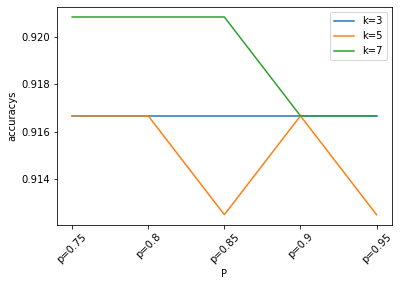

In [194]:
names = ['p=0.75', 'p=0.8', 'p=0.85', 'p=0.9','p=0.95'] 
x = range(len(names))
#画图，x轴为k值，y值为准确率
plt.plot(x, yc[0],label='k=3')
plt.plot(x, yc[1],label='k=5')
plt.plot(x, yc[2],label='k=7')
plt.xticks(x, names, rotation=45)
plt.legend(['k=3','k=5', 'k=7'])
plt.xlabel('P')
plt.ylabel('accuracys')
plt.show()

In [195]:
er=[]
for i in range(3):
    er.append([error1[i],error2[i],error3[i],error4[i],error5[i]])

In [196]:
er

[[0.083, 0.083, 0.083, 0.087, 0.079],
 [0.079, 0.079, 0.087, 0.083, 0.083],
 [0.079, 0.079, 0.083, 0.079, 0.079]]

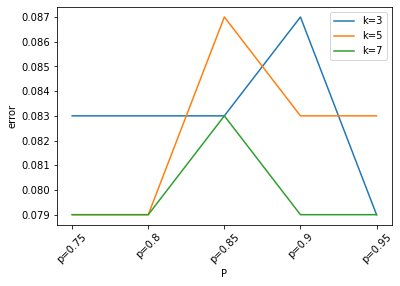

In [197]:
#交叉验证
names = ['p=0.75', 'p=0.8', 'p=0.85', 'p=0.9','p=0.95'] 
x = range(len(names))
#画图，x轴为k值，y值为误差值
plt.plot(x, er[0],label='k=3')
plt.plot(x, er[1],label='k=5')
plt.plot(x, er[2],label='k=7')
plt.xticks(x, names, rotation=45)
plt.legend(['k=3','k=5', 'k=7'])
plt.xlabel('P')
plt.ylabel('error')
plt.show()

In [198]:
#留一
ACC=[]
ACC.append(accuracy)
ACC.append(acc)
for i in range(5):
    ACC.append(((np.array(yc).T).tolist())[i])

In [199]:
ACC

[[0.875, 0.879, 0.871],
 [0.9, 0.888, 0.892],
 [0.9166666666666666, 0.9166666666666666, 0.9208333333333333],
 [0.9166666666666666, 0.9166666666666666, 0.9208333333333333],
 [0.9166666666666666, 0.9125, 0.9208333333333333],
 [0.9166666666666666, 0.9166666666666666, 0.9166666666666666],
 [0.9166666666666666, 0.9125, 0.9166666666666666]]

In [200]:
#sklearn
err=[]
err.append(error)
err.append(error0)
for i in range(5):
    err.append(((np.array(er).T).tolist())[i])

In [201]:
err

[[0.146, 0.125, 0.15],
 [0.096, 0.117, 0.096],
 [0.083, 0.079, 0.079],
 [0.083, 0.079, 0.079],
 [0.083, 0.087, 0.083],
 [0.087, 0.083, 0.079],
 [0.079, 0.083, 0.079]]

In [202]:
my_err=[]
my_err.append(my_scores)
my_err.append(my_scores0)
my_err.append(my_scores1)
my_err.append(my_scores2)
my_err.append(my_scores3)
my_err.append(my_scores4)
my_err.append(my_scores5)

In [203]:
my_err

[array([0.14166667, 0.12916667, 0.14583333]),
 array([0.1       , 0.10833333, 0.1       ]),
 array([0.075     , 0.08333333, 0.075     ]),
 array([0.075     , 0.08333333, 0.075     ]),
 array([0.08333333, 0.09583333, 0.08333333]),
 array([0.09166667, 0.08333333, 0.0875    ]),
 array([0.07916667, 0.08333333, 0.07916667])]

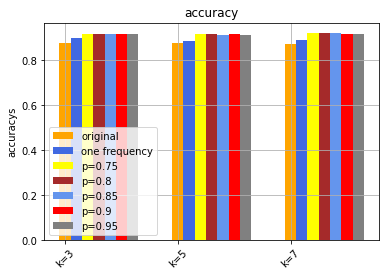

In [204]:
name = ['k=3', 'k=5', 'k=7']        
x = np.arange(len(name))
plt.xticks(x, name, rotation=45)
plt.grid(alpha=1)
# 生成多柱图
plt.bar(x , ACC[0], color='orange', width=0.1, label="original")
plt.bar(x+0.1 , ACC[1], color='royalblue', width=0.1, label="one frequency")
plt.bar(x+0.2 , ACC[2], color='yellow', width=0.1, label="p=0.75")
plt.bar(x+0.3 , ACC[3], color='brown', width=0.1, label="p=0.8")
plt.bar(x+0.4, ACC[4], color='cornflowerblue', width=0.1, label="p=0.85")
plt.bar(x+0.5 , ACC[5], color='red', width=0.1, label="p=0.9")
plt.bar(x+0.6 , ACC[6], color='grey', width=0.1, label="p=0.95")
plt.legend(['original','one frequency', 'p=0.75','p=0.8','p=0.85','p=0.9','p=0.95'],loc = 3)
plt.title('accuracy')
plt.ylabel('accuracys')
plt.show()


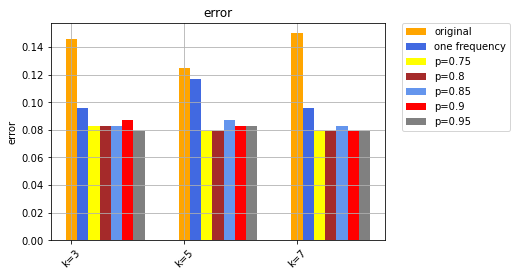

In [273]:
name = ['k=3', 'k=5', 'k=7']        
x = np.arange(len(name))
plt.xticks(x, name, rotation=45)
plt.grid(alpha=1)
# 生成多柱图
plt.bar(x , err[0], color='orange', width=0.1, label="original")
plt.bar(x+0.1 , err[1], color='royalblue', width=0.1, label="one frequency")
plt.bar(x+0.2 , err[2], color='yellow', width=0.1, label="p=0.75")
plt.bar(x+0.3 , err[3], color='brown', width=0.1, label="p=0.8")
plt.bar(x+0.4, err[4], color='cornflowerblue', width=0.1, label="p=0.85")
plt.bar(x+0.5 , err[5], color='red', width=0.1, label="p=0.9")
plt.bar(x+0.6 , err[6], color='grey', width=0.1, label="p=0.95")
plt.legend(['original','one frequency', 'p=0.75','p=0.8','p=0.85','p=0.9','p=0.95'],loc = 0,bbox_to_anchor=(1.05,1.0),borderaxespad = 0)

plt.title('error')
plt.ylabel('error')
plt.savefig('错误率柱状图.svg',bbox_inches='tight')
plt.show()


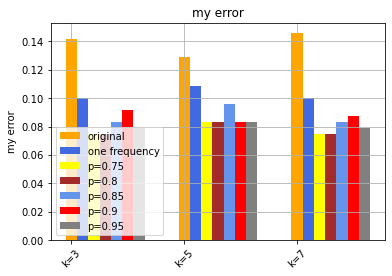

In [222]:
name = ['k=3', 'k=5', 'k=7']        
x = np.arange(len(name))
plt.xticks(x, name, rotation=45)
plt.grid(alpha=1)
# 生成多柱图
plt.bar(x , my_err[0], color='orange', width=0.1, label="original")
plt.bar(x+0.1 , my_err[1], color='royalblue', width=0.1, label="one frequency")
plt.bar(x+0.2 , my_err[2], color='yellow', width=0.1, label="p=0.75")
plt.bar(x+0.3 , my_err[3], color='brown', width=0.1, label="p=0.8")
plt.bar(x+0.4,my_err[4], color='cornflowerblue', width=0.1, label="p=0.85")
plt.bar(x+0.5 , my_err[5], color='red', width=0.1, label="p=0.9")
plt.bar(x+0.6 ,my_err[6], color='grey', width=0.1, label="p=0.95")
plt.legend(['original','one frequency', 'p=0.75','p=0.8','p=0.85','p=0.9','p=0.95'],loc = 3)
plt.title('my error')
plt.ylabel('my error')
plt.show()


In [223]:
my_min=[my_error_min,my_error_min0,my_error_min1,my_error_min2,my_error_min3,my_error_min4,my_error_min5]
my_max=[my_error_max,my_error_max0,my_error_max1,my_error_max2,my_error_max3,my_error_max4,my_error_max5]
mean=[]
for i in range(3):
    mean.append([error[i],error0[i],error1[i],error2[i],error3[i],error4[i],error5[i]])

In [224]:
yerr3 = np.zeros([2,len(mean[0])])
yerr3[0,:] =mean[0]- (np.array(my_min).T[0])
yerr3[1,:] =(np.array(my_max).T[0]) - mean[0]

yerr5 = np.zeros([2,len(mean[0])])
yerr5[0,:] =mean[1]- (np.array(my_min).T[1])
yerr5[1,:] =(np.array(my_max).T[1]) - mean[1]

yerr7 = np.zeros([2,len(mean[0])])
yerr7[0,:] =mean[2]- (np.array(my_min).T[2])
yerr7[1,:] =(np.array(my_max).T[2]) - mean[2]

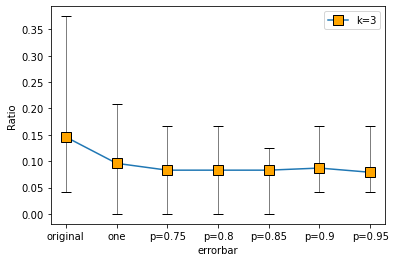

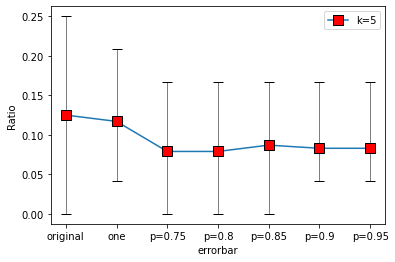

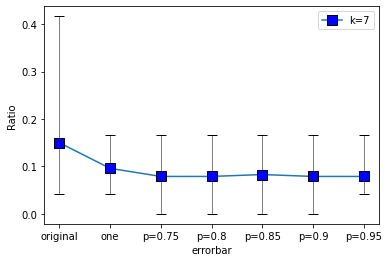

In [271]:
plt.figure()
x = range(7)
plt.errorbar(x,mean[0],yerr=yerr3[:,:],ecolor='k',elinewidth=0.5,marker='s',mfc='orange',mec='k',mew=1,ms=10,alpha=1,capsize=5,capthick=3,label="k=3")
#plt.errorbar(x,mean[1],yerr=yerr5[:,:],ecolor='k',elinewidth=0.5,marker='s',mfc='red',mec='k',mew=1,ms=10,alpha=1,capsize=5,capthick=3,label="k=5")
#plt.errorbar(x,mean[2],yerr=yerr7[:,:],ecolor='k',elinewidth=0.5,marker='s',mfc='gray',mec='k',mew=1,ms=10,alpha=1,capsize=5,capthick=3,label="k=7")
plt.xlabel("errorbar",fontsize=10)
plt.ylabel("Ratio", fontsize=10)
plt.xticks(x,['original','one', 'p=0.75','p=0.8','p=0.85','p=0.9','p=0.95'],fontsize=10) 
plt.yticks(fontsize=10) 
plt.legend(fontsize=10)
plt.savefig('误差棒图k=3.svg')
plt.show()


#plt.figure()
x = range(7)
#plt.errorbar(x,mean[0],yerr=yerr3[:,:],ecolor='k',elinewidth=0.5,marker='s',mfc='orange',mec='k',mew=1,ms=10,alpha=1,capsize=5,capthick=3,label="k=3")
plt.errorbar(x,mean[1],yerr=yerr5[:,:],ecolor='k',elinewidth=0.5,marker='s',mfc='red',mec='k',mew=1,ms=10,alpha=1,capsize=5,capthick=3,label="k=5")
#plt.errorbar(x,mean[2],yerr=yerr7[:,:],ecolor='k',elinewidth=0.5,marker='s',mfc='gray',mec='k',mew=1,ms=10,alpha=1,capsize=5,capthick=3,label="k=7")
plt.xlabel("errorbar",fontsize=10)
plt.ylabel("Ratio", fontsize=10)
plt.xticks(x,['original','one', 'p=0.75','p=0.8','p=0.85','p=0.9','p=0.95'],fontsize=10) 
plt.yticks(fontsize=10) 
plt.legend(fontsize=10)
plt.savefig('误差棒图k=5.svg')
plt.show()


#plt.figure()
x = range(7)
#plt.errorbar(x,mean[0],yerr=yerr3[:,:],ecolor='k',elinewidth=0.5,marker='s',mfc='orange',mec='k',mew=1,ms=10,alpha=1,capsize=5,capthick=3,label="k=3")
#plt.errorbar(x,mean[1],yerr=yerr5[:,:],ecolor='k',elinewidth=0.5,marker='s',mfc='red',mec='k',mew=1,ms=10,alpha=1,capsize=5,capthick=3,label="k=5")
plt.errorbar(x,mean[2],yerr=yerr7[:,:],ecolor='k',elinewidth=0.5,marker='s',mfc='blue',mec='k',mew=1,ms=10,alpha=1,capsize=5,capthick=3,label="k=7")
plt.xlabel("errorbar",fontsize=10)
plt.ylabel("Ratio", fontsize=10)
plt.xticks(x,['original','one', 'p=0.75','p=0.8','p=0.85','p=0.9','p=0.95'],fontsize=10) 
plt.yticks(fontsize=10) 
plt.legend(fontsize=10)
plt.savefig('误差棒图k=7.svg')
plt.show()
